# Figures to include in the paper

This notebook generates all the figures to include in the paper for the Literature Review and save them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import graph_tool.all as gt
import warnings
import itertools
from sklearn.metrics import cohen_kappa_score
from collections import defaultdict
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
warnings.filterwarnings('ignore')

In [3]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "lines.linewidth": 3,  "grid.linestyle": ":"}
sns.set_theme(context='notebook',style="ticks", font='Arial', font_scale=2, rc=custom_params)

In [4]:
savepath = '/m/cs/scratch/networks/trianaa1/Paper5/literature-review/results/figures'

# Inter-rater reliability

In [5]:
pm = pd.read_excel("/m/cs/scratch/networks/trianaa1/Paper5/literature-review/results/Literature Review.xlsx", sheet_name="PubMed")
sc = pd.read_excel("/m/cs/scratch/networks/trianaa1/Paper5/literature-review/results/Literature Review.xlsx", sheet_name="Scopus")
irr = pd.concat([pm,sc])
irr = irr[['Enrico','Nick','Ana']]
irr['cumulative'] = irr.sum(axis=1)
assert len(pm)+len(sc) == len(irr)

In [6]:
nick_ana = cohen_kappa_score(irr['Nick'], irr['Ana'])
enrico_ana = cohen_kappa_score(irr['Enrico'], irr['Ana'])
nick_enrico = cohen_kappa_score(irr['Nick'], irr['Enrico'])
print("###### Cohen Kappa coefficient ########")
print(f'Nick and Ana agreed on {round(nick_ana,2)}')
print(f'Enrico and Ana agreed on {round(enrico_ana,2)}')
print(f'Nick and Enrico agreed on {round(nick_enrico,2)}')

###### Cohen Kappa coefficient ########
Nick and Ana agreed on 0.2
Enrico and Ana agreed on 0.52
Nick and Enrico agreed on 0.27


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


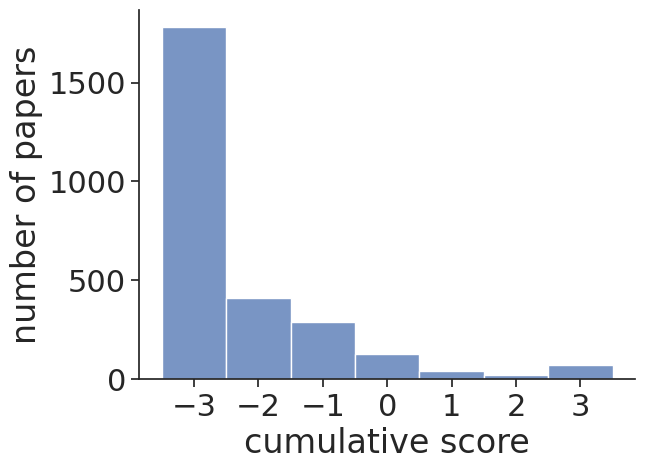

In [7]:
ax = sns.histplot(data=irr, x="cumulative", bins=7, binrange=[-3.5,3.5])
ax.set_ylabel('number of papers')
ax.set_xlabel('cumulative score')
plt.xticks(np.arange(-3, 4, 1))

plt.savefig(f'{savepath}/sup_fig1.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Content for tables

There are two tables in the paper, therefore we need to generate the content for those too. This will do:

In [8]:
df = pd.read_excel("/m/cs/scratch/networks/trianaa1/Paper5/literature-review/results/results_organized.xlsx")

## Table 1

In [9]:
st = df[['cohort', 'controlled-trial', 'cross-sectional', 'intervention', 'longitudinal']]
print('Study type')
st.sum(axis=0)

Study type


cohort               3.0
controlled-trial     8.0
cross-sectional     74.0
intervention         2.0
longitudinal         4.0
dtype: float64

In [10]:
print('Data source')
print(f're-used data: {len(df)- df["independent_study"].sum()}')
print(f'first-use data: {df["independent_study"].sum()}')

Data source
re-used data: 42.0
first-use data: 49.0


In [11]:
print('Patient inclusion')
print(f'patients included: {len(df[df["clinical_setting"]==1])}')
print(f'patients not included {len(df)- len(df[df["clinical_setting"]==1])}')

Patient inclusion
patients included: 38
patients not included 53


In [12]:
print('Number of diagnosis')
df["no_diff_diag"].value_counts()

Number of diagnosis


0.0    53
1.0    35
2.0     2
5.0     1
Name: no_diff_diag, dtype: int64

## Table 2

In [13]:
mri = df[['dti', 'smri', 'fmri', 'mr_angiography']]
print('MRI technique')
mri.sum(axis=0)

MRI technique


dti               22.0
smri              19.0
fmri              53.0
mr_angiography     3.0
dtype: float64

In [14]:
fmri = df[['rs-fmri', 'task-mri']]
print('fMRI technique')
fmri.sum(axis=0)

fMRI technique


rs-fmri     25.0
task-mri    29.0
dtype: float64

In [15]:
dev = df[['actigraph','beeper','fitness_tracker','smartphone','step_counter','wristwatch']]
dev['wristwatch'] = dev['wristwatch'] + dev['fitness_tracker']
dev.drop(columns=['fitness_tracker'], inplace=True)
print('device')
dev.sum(axis=0)

device


actigraph       39.0
beeper           5.0
smartphone      22.0
step_counter     6.0
wristwatch       9.0
dtype: float64

## Table 3

In [16]:
df['sample_size'].describe()

count      91.000000
mean      161.164835
std       567.275952
min         6.000000
25%        30.500000
50%        58.000000
75%        95.500000
max      5272.000000
Name: sample_size, dtype: float64

# Figure 1 

In [17]:
age = df[["Document","min_age", "max_age", "median_age", "mean_age", "clinical_setting"]]
age.replace(0, np.nan, inplace=True)

# Add a new column to the DataFrame to store the age to be plotted
age['age_to_plot'] = age['mean_age'].fillna(age['median_age'])
age['age_to_plot'] = age['age_to_plot'].fillna((age['min_age'] + age['max_age']) / 2)

# Remove rows with no age information
age = age.dropna(subset=['min_age', 'max_age', 'age_to_plot'], how='all')

# Sort the DataFrame by 'age_to_plot'
age = age.sort_values(by='age_to_plot', ascending=True)

# Reset the index after sorting
age.reset_index(drop=True, inplace=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


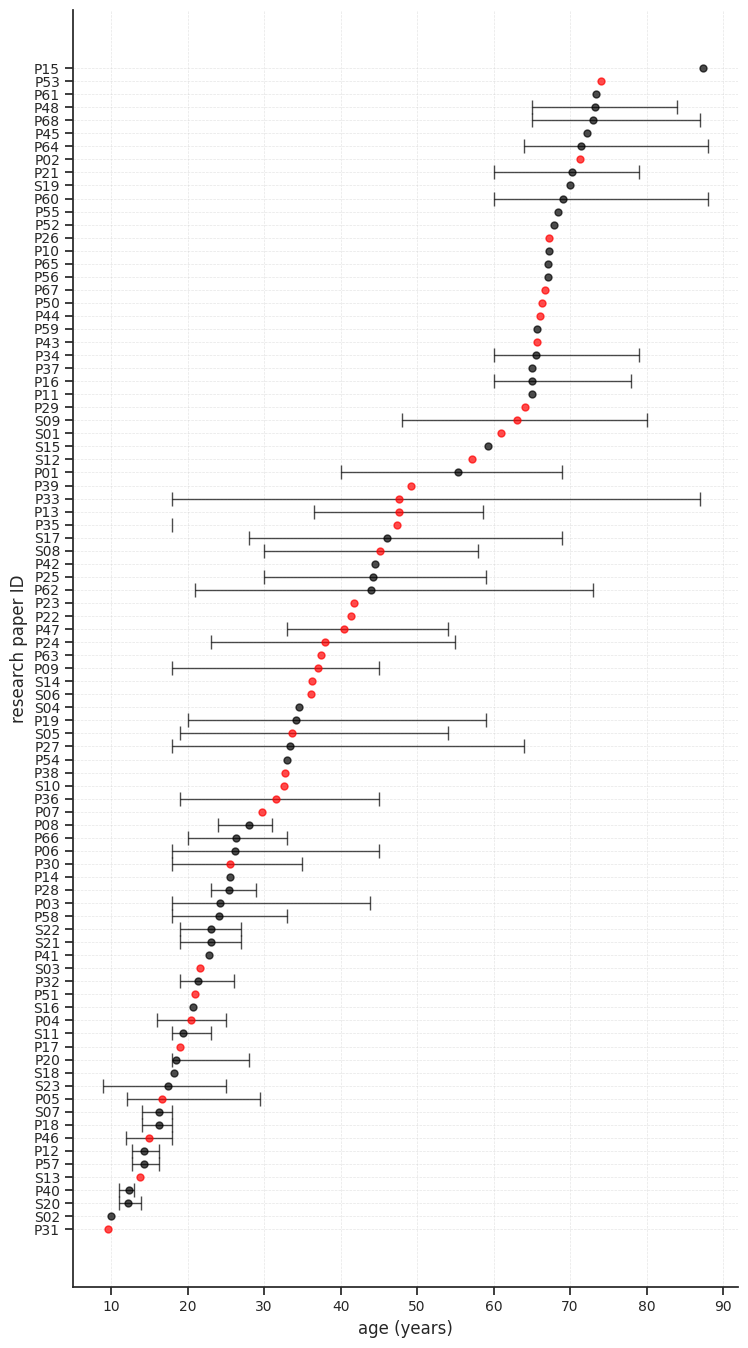

In [18]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 14))

# Plot the lines with whiskers for minimum and maximum age
for index, row in age.iterrows():
    dot_color = 'red' if row['clinical_setting'] == 1 else 'black'
    ax.errorbar(
        row['age_to_plot'],
        index,
        xerr=[[row['age_to_plot'] - row['min_age']], [row['max_age'] - row['age_to_plot']]],
        fmt='o',
        lw=1,
        alpha=0.7,
        markersize=5,
        markerfacecolor=dot_color,
        markeredgecolor=dot_color,
        ecolor='black',
        capsize=5,
    )

# Set axis labels and title
ax.set_xlabel('age (years)', fontsize=12)
ax.set_ylabel('research paper ID', fontsize=12)

# Customize the y-axis ticks to display the Document ID
ax.set_yticks(age.index)
ax.set_yticklabels(age['Document'])

# Set the axis tick label sizes
ax.tick_params(axis='both', which='major', labelsize=10)

# Add a grid
ax.grid(axis='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Display the plot
plt.tight_layout()
plt.savefig(f'{savepath}/fig1.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Figure 2

Figure 2 is a collection of other pieces of information. It includes: A) device function, B) duration of device use, C) number of samples discarded, and D) diagnosis studied

In [19]:
dev_func = df[['blood_pressure','comm_patterns','EMA','glucose','heart_rate','hrv','mobility_patterns','images',
         'physical_activity_sensor','resp_rate_sensor','screen_use','sleep_sensor','temperature','app_use']]
dev_func.loc[dev_func['blood_pressure']==1,'type'] = 'blood pressure'
dev_func.loc[dev_func['comm_patterns']==1,'type'] = 'communication'
dev_func.loc[dev_func['EMA']==1,'type'] = 'EMA'
dev_func.loc[dev_func['glucose']==1,'type'] = 'glucose'
dev_func.loc[dev_func['heart_rate']==1,'type'] = 'heart rate'
dev_func.loc[dev_func['hrv']==1,'type'] = 'heart rate variability'
dev_func.loc[dev_func['mobility_patterns']==1,'type'] = 'location'
dev_func.loc[dev_func['images']==1,'type'] = 'images'
dev_func.loc[dev_func['sleep_sensor']==1,'type'] = 'sleep'
dev_func.loc[dev_func['physical_activity_sensor']==1,'type'] = 'physical activity'
dev_func.loc[dev_func['resp_rate_sensor']==1,'type'] = 'respiration rate'
dev_func.loc[dev_func['screen_use']==1,'type'] = 'screen use'
dev_func.loc[dev_func['app_use']==1,'type'] = 'application use'
dev_func.loc[dev_func['temperature']==1,'type'] = 'temperature'

In [20]:
dq = df[['no_samples_discarded_mri','no_samples_discarded_dev','no_samples_discarded_other']]
dq.replace(0, np.nan, inplace=True)
dq.rename(columns={"no_samples_discarded_mri": "MRI", "no_samples_discarded_dev": "device", "no_samples_discarded_other":"other"}, inplace=True)

In [21]:
diag = df[['cognitive_decline', 'depression','anorexia', 'psychosis', 'schizophrenia', 'fibromyalgia', 'obesity', 
            'stroke', 'alzheimer', 'dementia', 'pediatric_sickle_cell_disease', 'chronic_fatigue_syndrome',
            'cognitive_impairment', 'knee_osteoarthritis', 'multiple_sclerosis', 'psichoaffective_dissorder', 
            'hypertension', 'anxiety', 'down_syndrome', 'chronic_obstructive_pulmonary_disease', 'bipolar']]
diag.loc[diag['down_syndrome']==1,'type'] = 'down syndrome'
diag.loc[diag['cognitive_decline']==1,'type'] = 'cognitive \n impairment'
diag.loc[diag['cognitive_impairment']==1,'type'] = 'cognitive \n impairment'
diag.loc[diag['alzheimer']==1,'type'] = "Alzheimer’s"
diag.loc[diag['dementia']==1,'type'] = 'dementia'
diag.loc[diag['depression']==1,'type'] = 'depression'
diag.loc[diag['bipolar']==1,'type'] = 'bipolar'
diag.loc[diag['anxiety']==1,'type'] = 'anxiety'
diag.loc[diag['psychosis']==1,'type'] = 'psychosis'
diag.loc[diag['schizophrenia']==1,'type'] = 'schizophrenia'
diag.loc[diag['psichoaffective_dissorder']==1,'type'] = 'psychoaffective \n dissorder'
diag.loc[diag['anorexia']==1,'type'] = 'anorexia'
diag.loc[diag['obesity']==1,'type'] = 'obesity'
diag.loc[diag['fibromyalgia']==1,'type'] = 'fibromyalgia'
diag.loc[diag['multiple_sclerosis']==1,'type'] = 'multiple sclerosis'
diag.loc[diag['hypertension']==1,'type'] = 'hypertension'
diag.loc[diag['stroke']==1,'type'] = 'stroke'
diag.loc[diag['pediatric_sickle_cell_disease']==1,'type'] = 'pediatric sickle \n cell disease'
diag.loc[diag['chronic_fatigue_syndrome']==1,'type'] = 'chronic fatigue \n syndrome'
diag.loc[diag['knee_osteoarthritis']==1,'type'] = 'knee osteoarthritis'
diag.loc[diag['chronic_obstructive_pulmonary_disease']==1,'type'] = 'chronic obstructive \n pulmonary disease'

In [22]:
dev_dur = df['dev_dur'].to_frame()
dev_dur.dropna(inplace=True)

def convert_to_days(dev_dur_str):
    if not isinstance(dev_dur_str, str) or len(dev_dur_str)<2:
        return None

    num = int(dev_dur_str[:-1])
    unit = dev_dur_str[-1]

    if unit == 'H':
        return num / 24
    elif unit == 'D':
        return num
    elif unit == 'W':
        return num * 7
    elif unit == 'M':
        return num * 30.44  # Approximate days in a month
    else:
        return None

# Apply the custom function to the dev_dur column
dev_dur['device use'] = dev_dur['dev_dur'].apply(convert_to_days)
dev_dur.dropna(inplace=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


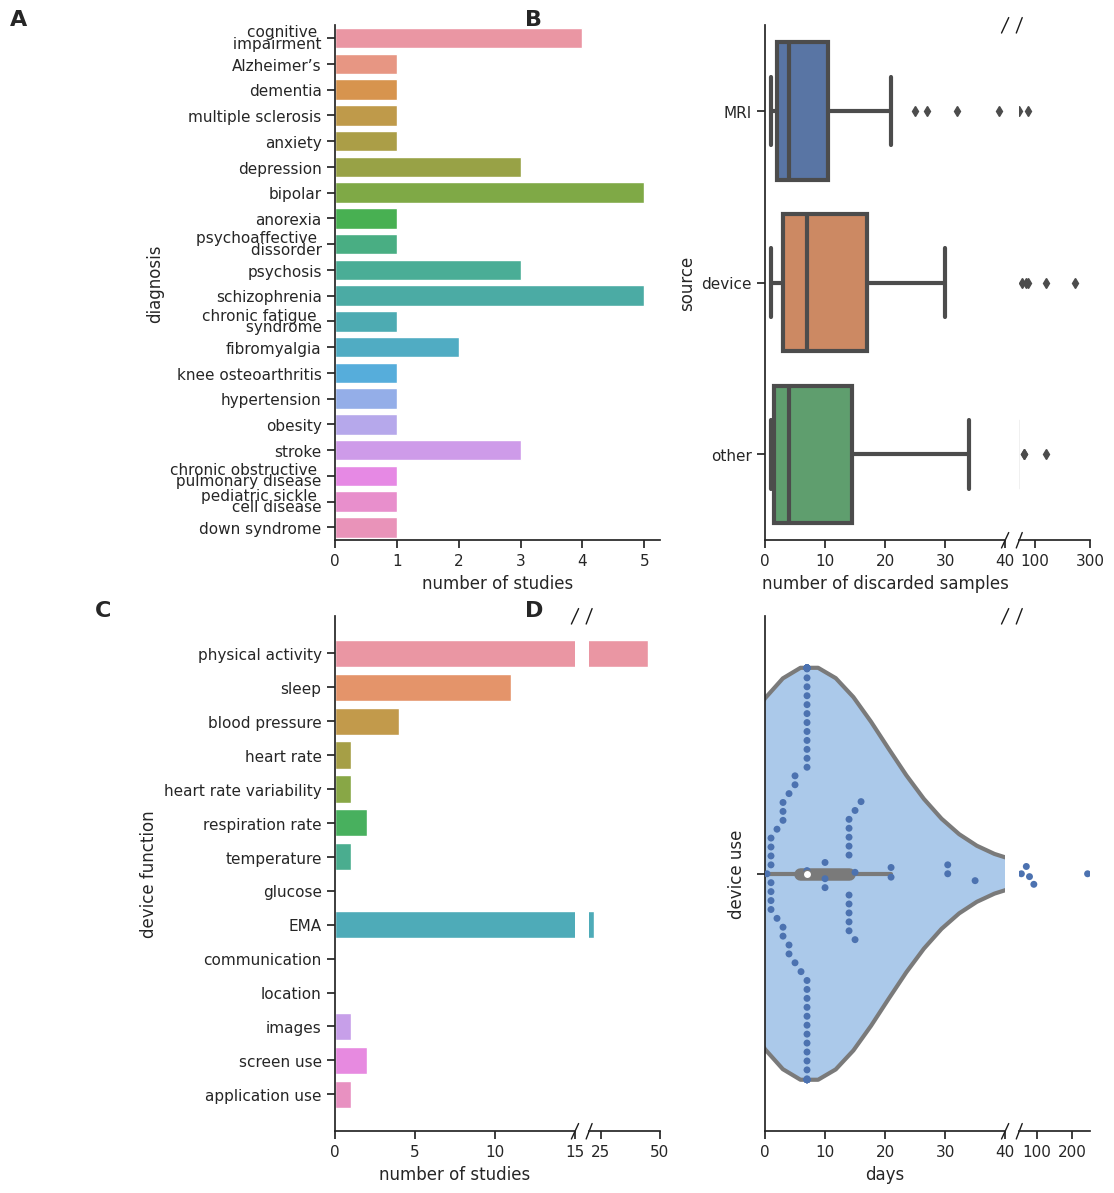

In [23]:
sns.set_theme(context='notebook',style="ticks", font='Arial', font_scale=1, rc=custom_params)
fig = plt.figure(figsize=(10,12))
gs0 = fig.add_gridspec(2, 2) # Four plots

#for device function
gs1 = gs0[2].subgridspec(1, 4, wspace=0.2)
ax11 = fig.add_subplot(gs1[0:3])
ax12 = fig.add_subplot(gs1[3:4])
ax11 = sns.countplot(y=dev_func["type"], order=['physical activity', 'sleep', 'blood pressure', 'heart rate', 'heart rate variability',
                                       'respiration rate','temperature','glucose', 'EMA', 'communication','location', 'images',
                                       'screen use', 'application use'], ax=ax11)
ax11.set_xlim(0,15)
ax11.set_ylabel("device function")
ax11.set_xlabel("number of studies")

ax12 = sns.countplot(y=dev_func["type"], order=['physical activity', 'sleep', 'blood pressure', 'heart rate', 'heart rate variability',
                                       'respiration rate','temperature','glucose', 'EMA', 'communication','location', 'images',
                                       'screen use', 'application use'], ax=ax12)
ax12.set_xlim(20,50)
ax12.set_xlabel(" ")
ax12.axes.get_yaxis().set_visible(False)
ax12.spines['left'].set_visible(False)

d = .015  
slope = 2.8
kwargs = dict(transform=ax12.transAxes, color='k', clip_on=False, lw=1)
ax12.plot((-slope*d, +slope*d), (-d, +d), **kwargs)        
ax12.plot((-slope*d, +slope*d), (1 - d, 1 + d), **kwargs) 
kwargs.update(transform=ax11.transAxes) 
ax11.plot((1 - d, 1 + d), (-d, +d), **kwargs) 
ax11.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#for dev duration
gs2 = gs0[3].subgridspec(1, 4, wspace=0.2)
ax21 = fig.add_subplot(gs2[0:3])
ax22 = fig.add_subplot(gs2[3:4])
ax21 = sns.swarmplot(data=dev_dur, x="device use", ax=ax21, orient="h")
ax21 = sns.violinplot(data=dev_dur, x="device use", ax=ax21, orient="h", palette="pastel")
ax21.set_xlim(0,40)
ax21.set_ylabel("device use")
ax21.set_xlabel("days")
ax22 = sns.swarmplot(data=dev_dur, x="device use", ax=ax22, orient="h")
ax22.set_xlim(50,250)
ax22.set_xlabel(" ")
ax22.axes.get_yaxis().set_visible(False)
ax22.spines['left'].set_visible(False)

d = .015  
slope = 2.8
kwargs = dict(transform=ax22.transAxes, color='k', clip_on=False, lw=1)
ax22.plot((-slope*d, +slope*d), (-d, +d), **kwargs)        
ax22.plot((-slope*d, +slope*d), (1 - d, 1 + d), **kwargs) 
kwargs.update(transform=ax21.transAxes) 
ax21.plot((1 - d, 1 + d), (-d, +d), **kwargs) 
ax21.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#for discard numbers
gs3 = gs0[1].subgridspec(1, 4, wspace=0.2)
ax31 = fig.add_subplot(gs3[0:3])
ax32 = fig.add_subplot(gs3[3:4])

ax31 = sns.boxplot(data=dq, orient="h", ax=ax31)
ax31.set_xlim(0,40)
ax31.set_ylabel("source")
ax31.set_xlabel("number of discarded samples")

ax32 = sns.boxplot(data=dq, orient="h", ax=ax32)
ax32.set_xlim(42,300)
ax32.set_xlabel(" ")
ax32.axes.get_yaxis().set_visible(False)
ax32.spines['left'].set_visible(False)
ax32.set_xticks([100,300])

d = .015  
slope = 2.8
kwargs = dict(transform=ax32.transAxes, color='k', clip_on=False, lw=1)
ax32.plot((-slope*d, +slope*d), (-d, +d), **kwargs)        
ax32.plot((-slope*d, +slope*d), (1 - d, 1 + d), **kwargs) 
kwargs.update(transform=ax31.transAxes) 
ax31.plot((1 - d, 1 + d), (-d, +d), **kwargs) 
ax31.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#for the diagnostics
order=['cognitive \n impairment', "Alzheimer’s", 'dementia', 'multiple sclerosis',
       'anxiety', 'depression', 'bipolar', 'anorexia', 'psychoaffective \n dissorder', 'psychosis','schizophrenia',
       'chronic fatigue \n syndrome', 'fibromyalgia', 'knee osteoarthritis',
       'hypertension', 'obesity', 'stroke', 'chronic obstructive \n pulmonary disease',
       'pediatric sickle \n cell disease', 'down syndrome']
ax4 = fig.add_subplot(gs0[0])
ax4 = sns.countplot(y=diag["type"], order=order, ax=ax4)
ax4.set_ylabel("diagnosis")
ax4.set_xlabel("number of studies")
ax4.set_yticklabels(order,linespacing=0.7)

label_x = -1
label_y = 1

fig.text(label_x, label_y, 'C', transform=ax11.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'D', transform=ax21.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'B', transform=ax31.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'A', transform=ax4.transAxes, fontsize=16, fontweight='bold')


plt.tight_layout()
plt.savefig(f'{savepath}/fig2_v1.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
diag = df[['cognitive_decline', 'depression','anorexia', 'psychosis', 'schizophrenia', 'fibromyalgia', 'obesity', 
            'stroke', 'alzheimer', 'dementia', 'pediatric_sickle_cell_disease', 'chronic_fatigue_syndrome',
            'cognitive_impairment', 'knee_osteoarthritis', 'multiple_sclerosis', 'psichoaffective_dissorder', 
            'hypertension', 'anxiety', 'down_syndrome', 'chronic_obstructive_pulmonary_disease', 'bipolar']]
diag.loc[diag['down_syndrome']==1,'type'] = 'pediatric'
diag.loc[diag['cognitive_decline']==1,'type'] = 'neurological'
diag.loc[diag['cognitive_impairment']==1,'type'] = 'neurological'
diag.loc[diag['alzheimer']==1,'type'] = 'neurological'
diag.loc[diag['dementia']==1,'type'] = 'neurological'
diag.loc[diag['depression']==1,'type'] = 'psychiatric'
diag.loc[diag['bipolar']==1,'type'] = 'psychiatric'
diag.loc[diag['anxiety']==1,'type'] = 'psychiatric'
diag.loc[diag['psychosis']==1,'type'] = 'psychiatric'
diag.loc[diag['schizophrenia']==1,'type'] = 'psychiatric'
diag.loc[diag['psichoaffective_dissorder']==1,'type'] = 'psychiatric'
diag.loc[diag['anorexia']==1,'type'] = 'psychiatric'
diag.loc[diag['obesity']==1,'type'] = 'systemic medical'
diag.loc[diag['fibromyalgia']==1,'type'] = 'musculoskeletal'
diag.loc[diag['multiple_sclerosis']==1,'type'] = 'neurological'
diag.loc[diag['hypertension']==1,'type'] = 'systemic medical'
diag.loc[diag['stroke']==1,'type'] = 'systemic medical'
diag.loc[diag['pediatric_sickle_cell_disease']==1,'type'] = 'pediatric'
diag.loc[diag['chronic_fatigue_syndrome']==1,'type'] = 'musculoskeletal'
diag.loc[diag['knee_osteoarthritis']==1,'type'] = 'musculoskeletal'
diag.loc[diag['chronic_obstructive_pulmonary_disease']==1,'type'] = 'systemic medical'

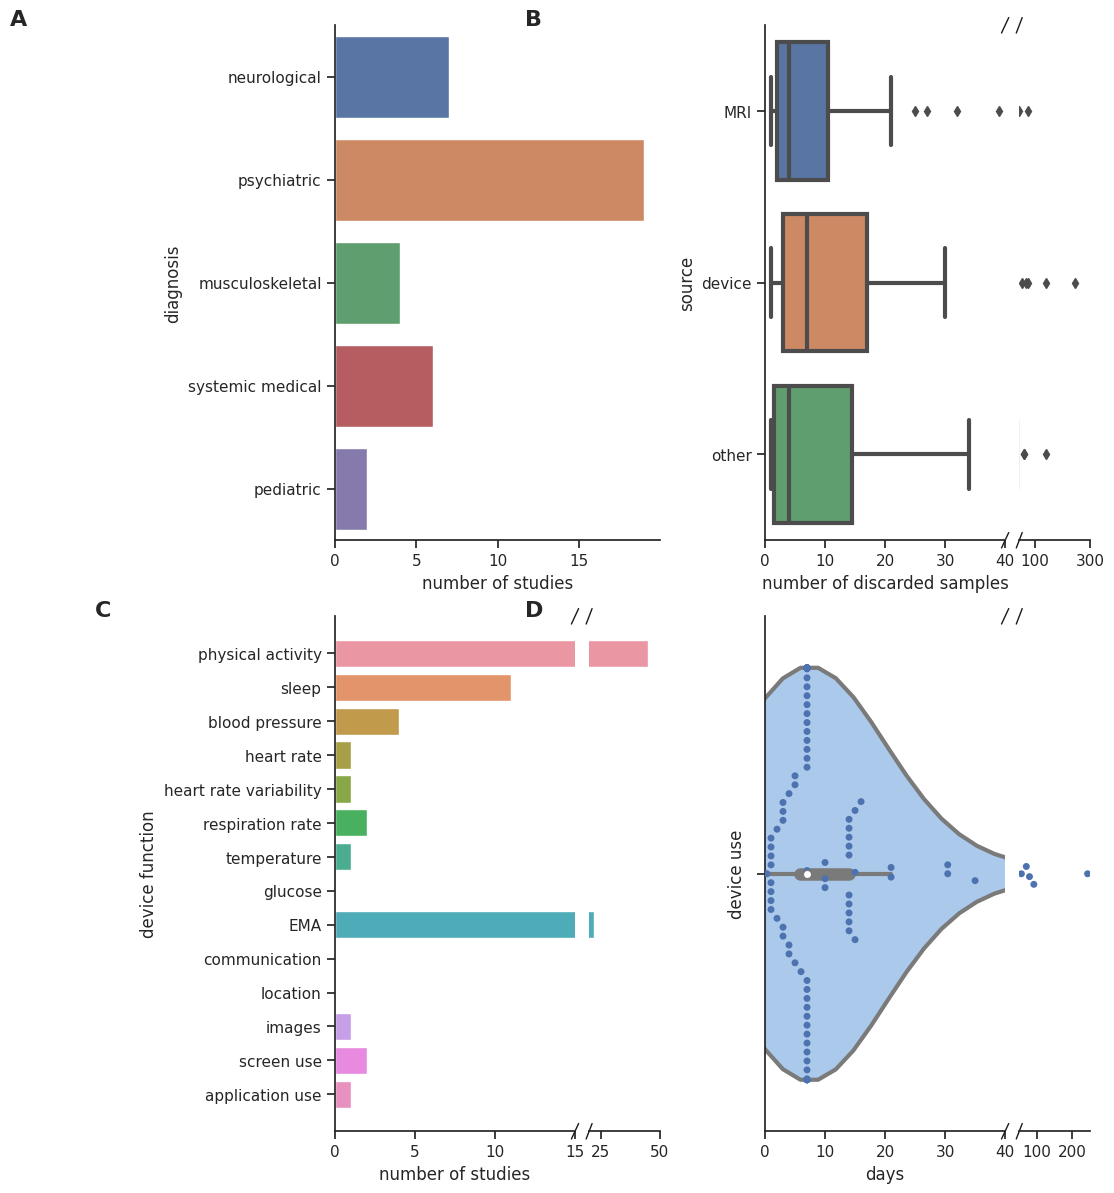

In [25]:
sns.set_theme(context='notebook',style="ticks", font='Arial', font_scale=1, rc=custom_params)
fig = plt.figure(figsize=(10,12))
gs0 = fig.add_gridspec(2, 2) # Four plots

#for device function
gs1 = gs0[2].subgridspec(1, 4, wspace=0.2)
ax11 = fig.add_subplot(gs1[0:3])
ax12 = fig.add_subplot(gs1[3:4])
ax11 = sns.countplot(y=dev_func["type"], order=['physical activity', 'sleep', 'blood pressure', 'heart rate', 'heart rate variability',
                                       'respiration rate','temperature','glucose', 'EMA', 'communication','location', 'images',
                                       'screen use', 'application use'], ax=ax11)
ax11.set_xlim(0,15)
ax11.set_ylabel("device function")
ax11.set_xlabel("number of studies")

ax12 = sns.countplot(y=dev_func["type"], order=['physical activity', 'sleep', 'blood pressure', 'heart rate', 'heart rate variability',
                                       'respiration rate','temperature','glucose', 'EMA', 'communication','location', 'images',
                                       'screen use', 'application use'], ax=ax12)
ax12.set_xlim(20,50)
ax12.set_xlabel(" ")
ax12.axes.get_yaxis().set_visible(False)
ax12.spines['left'].set_visible(False)

d = .015  
slope = 2.8
kwargs = dict(transform=ax12.transAxes, color='k', clip_on=False, lw=1)
ax12.plot((-slope*d, +slope*d), (-d, +d), **kwargs)        
ax12.plot((-slope*d, +slope*d), (1 - d, 1 + d), **kwargs) 
kwargs.update(transform=ax11.transAxes) 
ax11.plot((1 - d, 1 + d), (-d, +d), **kwargs) 
ax11.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#for dev duration
gs2 = gs0[3].subgridspec(1, 4, wspace=0.2)
ax21 = fig.add_subplot(gs2[0:3])
ax22 = fig.add_subplot(gs2[3:4])
ax21 = sns.swarmplot(data=dev_dur, x="device use", ax=ax21, orient="h")
ax21 = sns.violinplot(data=dev_dur, x="device use", ax=ax21, orient="h", palette="pastel")
ax21.set_xlim(0,40)
ax21.set_xlabel("days")
ax21.set_ylabel("device use")
ax22 = sns.swarmplot(data=dev_dur, x="device use", ax=ax22, orient="h")
ax22.set_xlim(50,250)
ax22.set_xlabel(" ")
ax22.axes.get_yaxis().set_visible(False)
ax22.spines['left'].set_visible(False)

d = .015  
slope = 2.8
kwargs = dict(transform=ax22.transAxes, color='k', clip_on=False, lw=1)
ax22.plot((-slope*d, +slope*d), (-d, +d), **kwargs)        
ax22.plot((-slope*d, +slope*d), (1 - d, 1 + d), **kwargs) 
kwargs.update(transform=ax21.transAxes) 
ax21.plot((1 - d, 1 + d), (-d, +d), **kwargs) 
ax21.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#for discard numbers
gs3 = gs0[1].subgridspec(1, 4, wspace=0.2)
ax31 = fig.add_subplot(gs3[0:3])
ax32 = fig.add_subplot(gs3[3:4])

ax31 = sns.boxplot(data=dq, orient="h", ax=ax31)
ax31.set_xlim(0,40)
ax31.set_ylabel("source")
ax31.set_xlabel("number of discarded samples")

ax32 = sns.boxplot(data=dq, orient="h", ax=ax32)
ax32.set_xlim(42,300)
ax32.set_xlabel(" ")
ax32.axes.get_yaxis().set_visible(False)
ax32.spines['left'].set_visible(False)
ax32.set_xticks([100,300])

d = .015  
slope = 2.8
kwargs = dict(transform=ax32.transAxes, color='k', clip_on=False, lw=1)
ax32.plot((-slope*d, +slope*d), (-d, +d), **kwargs)        
ax32.plot((-slope*d, +slope*d), (1 - d, 1 + d), **kwargs) 
kwargs.update(transform=ax31.transAxes) 
ax31.plot((1 - d, 1 + d), (-d, +d), **kwargs) 
ax31.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#for the diagnostics
ax4 = fig.add_subplot(gs0[0])
ax4 = sns.countplot(y=diag["type"], ax=ax4)
ax4.set_ylabel("diagnosis")
ax4.set_xlabel("number of studies")

label_x = -1
label_y = 1

fig.text(label_x, label_y, 'C', transform=ax11.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'D', transform=ax21.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'B', transform=ax31.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'A', transform=ax4.transAxes, fontsize=16, fontweight='bold')


plt.tight_layout()
plt.savefig(f'{savepath}/fig2_v2.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
diag = df[['cognitive_decline', 'depression','anorexia', 'psychosis', 'schizophrenia', 'fibromyalgia', 'obesity', 
            'stroke', 'alzheimer', 'dementia', 'pediatric_sickle_cell_disease', 'chronic_fatigue_syndrome',
            'cognitive_impairment', 'knee_osteoarthritis', 'multiple_sclerosis', 'psichoaffective_dissorder', 
            'hypertension', 'anxiety', 'down_syndrome', 'chronic_obstructive_pulmonary_disease', 'bipolar']]
print('diagnosis')
diag.sum()

diagnosis


cognitive_decline                        2.0
depression                               3.0
anorexia                                 1.0
psychosis                                3.0
schizophrenia                            6.0
fibromyalgia                             2.0
obesity                                  1.0
stroke                                   3.0
alzheimer                                2.0
dementia                                 1.0
pediatric_sickle_cell_disease            1.0
chronic_fatigue_syndrome                 1.0
cognitive_impairment                     2.0
knee_osteoarthritis                      1.0
multiple_sclerosis                       1.0
psichoaffective_dissorder                1.0
hypertension                             1.0
anxiety                                  1.0
down_syndrome                            2.0
chronic_obstructive_pulmonary_disease    1.0
bipolar                                  5.0
dtype: float64

In [27]:
print('discard reason')
df["dev_discard_reason"].value_counts()

discard reason


                      52
insufficient data     27
technical problems     4
inconsistent data      2
user refusal           2
corrupted data         1
selected subset        1
effect not sampled     1
Name: dev_discard_reason, dtype: int64

# Time plots

We will add one plot regarding the evolution of the graph in time. These are the plots

In [28]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [29]:
cols = ['blood_pressure','comm_patterns','EMA','glucose','heart_rate','hrv','mobility_patterns','images',
        'physical_activity_sensor','resp_rate_sensor','screen_use','sleep_sensor','temperature','app_use',
        'dti', 'smri', 'fmri', 'mr_angiography', 'year']
tp = df[cols]

In [30]:
tp.rename(columns={"blood_pressure": "blood pressure", "comm_patterns": "communication patterns",
                     "EMA": "EMA", "glucose":"glucose", "heart_rate": "heart rate", "hrv": "heart rate variability",
                     "mobility_patterns":"mobility patterns", "images":"images", 
                     "physical_activity_sensor":"physical activity", "resp_rate_sensor":"respiration rate",
                     "screen_use":"screen use", "sleep_sensor":"sleep", "temperature":"temperature",
                     "app_use":"app use", "dti":"DWI", "smri":"T1/T2-weighted MRI", "fmri":"fMRI", 
                     "mr_angiography":"angiography"}, inplace=True)

In [31]:
def sum_columns_by_year(df):
    result = {}
    
    # Extract the column names, excluding the 'year' column
    column_names = [col for col in df.columns if col != 'year']
    
    # Find the range of years in the DataFrame
    start_year = df['year'].min()
    end_year = df['year'].max()

    # Initialize the result dictionary
    for col in column_names:
        result[col] = []
    
    for year in range(start_year, end_year + 1):
        if year in df['year'].values:
            yearly_data = df[df['year'] == year]
            for col in column_names:
                result[col].append(yearly_data[col].sum())
        else:
            for col in column_names:
                result[col].append(0)

    return result

In [32]:
tp_all = sum_columns_by_year(tp)

In [33]:
#Create the overall heatmap
heatmap_df = pd.DataFrame(tp_all)

# Transpose the DataFrame and set the index to column names
heatmap_df = heatmap_df.T
heatmap_df.index.name = 'Columns'
heatmap_df.columns = range(df['year'].min(), df['year'].max() + 1)

In [34]:
heatmap_df = heatmap_df.reindex(['blood pressure', 'heart rate', 'heart rate variability', 'respiration rate', 'glucose', 'temperature', 
                         'communication patterns', 'mobility patterns', 'images', 'screen use', 'app use', 'EMA', 'physical activity', 'sleep', 
                         'DWI', 'T1/T2-weighted MRI', 'fMRI', 'angiography'])

In [35]:
#Now by combination of MRI-device
def add_missing_years(df, start_year=2007, end_year=2022):
    year_range = range(start_year, end_year + 1)
    for year in year_range:
        if year not in df.columns:
            df[year] = 0
    
    df = df.reindex(sorted(df.columns), axis=1)
    return df

def get_matrix_year(tp):
    dev = ['blood pressure', 'communication patterns', 'EMA', 'glucose',
       'heart rate', 'heart rate variability', 'mobility patterns', 'images',
       'physical activity', 'respiration rate', 'screen use', 'sleep',
       'temperature', 'app use']
    tp_all = sum_columns_by_year(tp)
    heatmap_df = pd.DataFrame(tp_all)
    heatmap_df = heatmap_df[dev]
    heatmap_df = heatmap_df.T
    heatmap_df.columns = range(tp['year'].min(), tp['year'].max() + 1)
    heatmap_df.index.name = 'Columns'
    
    heatmap_df = add_missing_years(heatmap_df, start_year=2007, end_year=2022)

    heatmap_df = heatmap_df.reindex(['blood pressure', 'heart rate', 'heart rate variability', 'respiration rate', 'glucose', 'temperature', 
                             'communication patterns', 'mobility patterns', 'images', 'screen use', 'app use', 'EMA', 'physical activity', 'sleep'])
    return heatmap_df

In [36]:
#Now combos per year
tp_dti = tp[tp['DWI']==1]
heatmap_dti = get_matrix_year(tp_dti)

tp_smri = tp[tp['T1/T2-weighted MRI']==1]
heatmap_smri = get_matrix_year(tp_smri)

tp_fmri = tp[tp['fMRI']==1]
heatmap_fmri = get_matrix_year(tp_fmri)

tp_ang = tp[tp['angiography']==1]
heatmap_ang = get_matrix_year(tp_ang)

In [37]:
#Create the colormap
colors = ['#ffffff','#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
cmap = ListedColormap(colors)

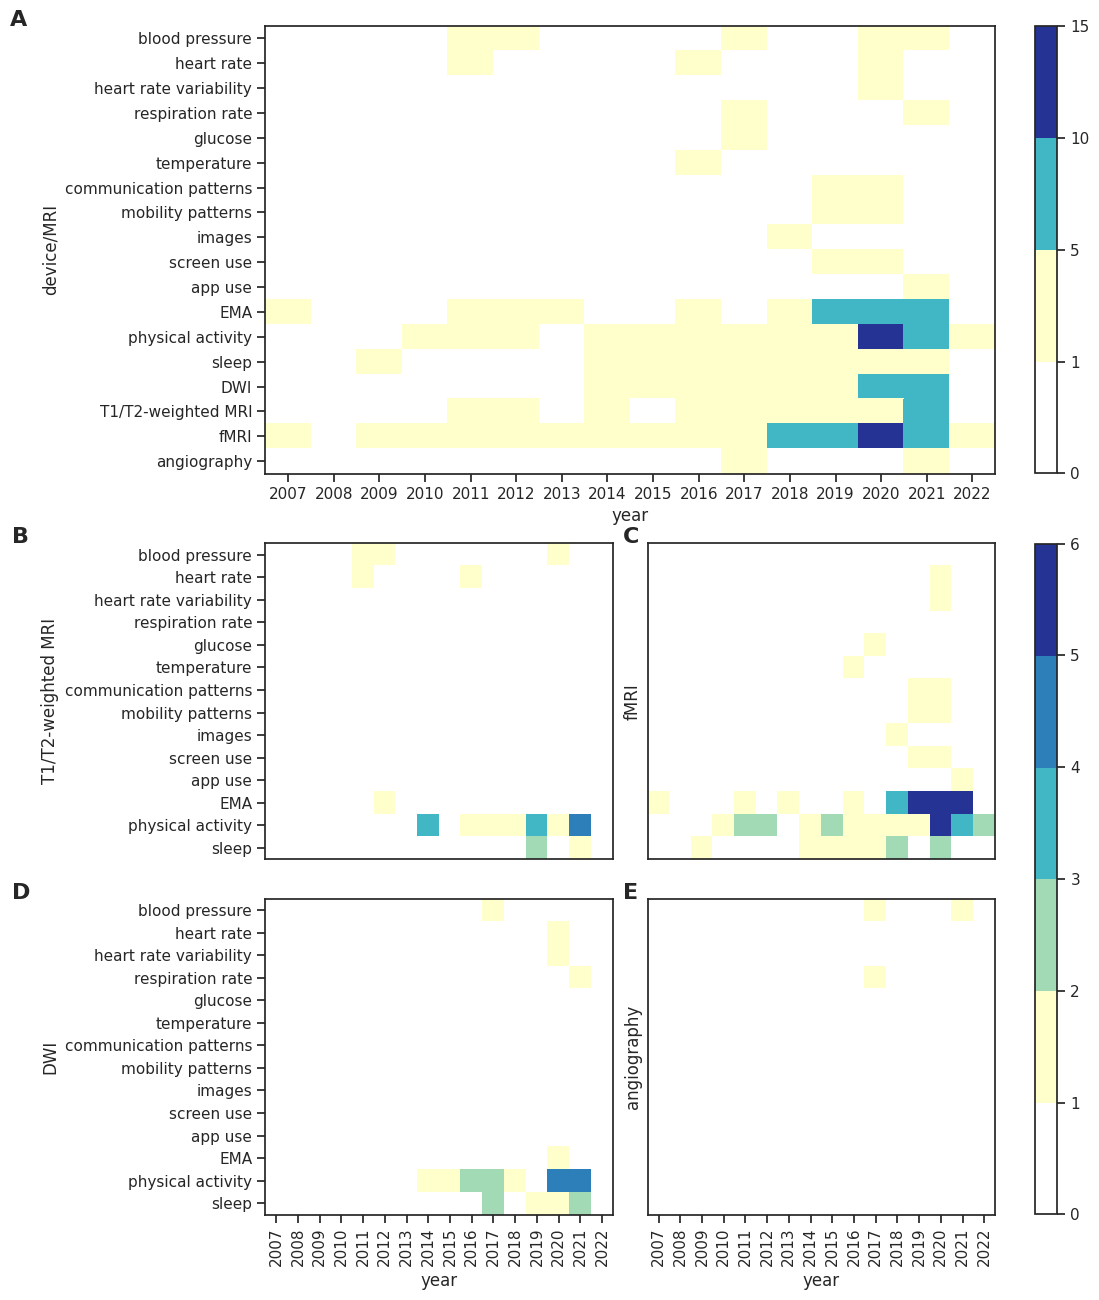

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

fig = plt.figure(figsize=(11, 13))
gs0 = fig.add_gridspec(2, 1, height_ratios=[1, 1.5])  # Four plots

# for overall heatmap
bins = [0, 1, 5, 10, 15]
norm = BoundaryNorm(bins, cmap.N)

ax1 = fig.add_subplot(gs0[0])
sns.heatmap(heatmap_df, annot=False, fmt='g', cmap=cmap, norm=norm, vmin=bins[0], vmax=bins[-1], cbar=False, ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('device/MRI')
for _, spine in ax1.spines.items():
    spine.set_visible(True)

# for sMRI
bins = [0, 1, 2, 3, 4, 5, 6]
norm = BoundaryNorm(bins, cmap.N)

gs1 = gs0[1].subgridspec(2, 2, wspace=0.1)
ax21 = fig.add_subplot(gs1[0:1])
sns.heatmap(heatmap_smri, annot=False, fmt='g', cmap=cmap, norm=norm, vmin=bins[0], vmax=bins[-1], cbar=False, ax=ax21)
ax21.set_ylabel("T1/T2-weighted MRI")
ax21.axes.get_xaxis().set_visible(False)
for _, spine in ax21.spines.items():
    spine.set_visible(True)

# for fMRI
ax22 = fig.add_subplot(gs1[1:2])
sns.heatmap(heatmap_fmri, annot=False, fmt='g', cmap=cmap, norm=norm, vmin=bins[0], vmax=bins[-1], cbar=False, ax=ax22)
ax22.set_ylabel("fMRI")
ax22.axes.get_yaxis().set_ticks([])
ax22.axes.get_xaxis().set_visible(False)
for _, spine in ax22.spines.items():
    spine.set_visible(True)

# for DTI
ax23 = fig.add_subplot(gs1[2:3])
sns.heatmap(heatmap_dti, annot=False, fmt='g', cmap=cmap, norm=norm, vmin=bins[0], vmax=bins[-1], cbar=False, ax=ax23)
ax23.set_ylabel("DWI")
ax23.set_xlabel("year")
for _, spine in ax23.spines.items():
    spine.set_visible(True)

# for angiography
ax24 = fig.add_subplot(gs1[3:4])
sns.heatmap(heatmap_ang, annot=False, fmt='g', cmap=cmap, norm=norm, vmin=bins[0], vmax=bins[-1], cbar=False, ax=ax24)
ax24.set_ylabel("angiography")
ax24.axes.get_yaxis().set_ticks([])
ax24.set_xlabel("year")
for _, spine in ax24.spines.items():
    spine.set_visible(True)

# Create the main heatmap colorbar
cax1 = fig.add_axes([0.92, 0.642, 0.02, 0.344])
fig.colorbar(ax1.get_children()[0], cax=cax1)

# Create a taller colorbar for gs0[1] on the right-hand side that covers the height of ax22 and ax24
cax2 = fig.add_axes([0.92, 0.072, 0.02, 0.516])
fig.colorbar(ax22.get_children()[0], cax=cax2)

label_x = -0.35
label_y = 1
fig.text(label_x, label_y, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold')

label_x = -0.73
label_y = 1
fig.text(label_x, label_y, 'B', transform=ax21.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'D', transform=ax23.transAxes, fontsize=16, fontweight='bold')

label_x = -0.07
label_y = 1
fig.text(label_x, label_y, 'C', transform=ax22.transAxes, fontsize=16, fontweight='bold')
fig.text(label_x, label_y, 'E', transform=ax24.transAxes, fontsize=16, fontweight='bold')


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig(f'{savepath}/fig5.pdf', dpi=300, bbox_inches='tight')
plt.show()